# Trabalho de Implementação e Análise de Algoritmos de Implementação

### Integrantes: 
João Canavarro

Renan Cunha

Ronaldd Pinho

Wagner Felidré

In [1]:
import sys
sys.path.append("algoritmos/")

## Questão 1

## Questão 2

## Questão 3

In [ ]:
qual foi

## Questão 4

<font size=4>
    Compare o tempo de execução dos algoritmos CountingSort e QuickSort em situações reais de uso. Explique qual algoritmo é mais eficiente e por que.
</font>

In [4]:
import numpy as np, numpy.random as npr
import matplotlib.pyplot as plt
import time
from quick_sort import quick_sort as quick
from counting_sort import counting_sort as count

In [5]:
# Roda e retorna o tempo do algoritmo de ordenação
# Parâmetros: Array, NomeDoAlgoritmo

def sorting_time(A, sorter):
    if sorter == 'quick':
        start = time.time()
        A1 = np.array(quick(A))
        end = time.time()
    elif sorter == 'count':
        start = time.time()
        A1 = np.array(count(A))
        end = time.time()
        
    return round( (end-start), 4)

In [6]:
# Em 5 iterações: cria 1 array em cada iteração e ordena com os dois algoritmos
# e guarda os 5 tempos de execução de cada algoritmo e retorna as suas médias

def media_5exec(SIZE, RANGE):
    quick_times = np.zeros(5)
    count_times = np.zeros(5)
    for i in range(5):
        # cria array aleatorio
        ARRAY = npr.randint(RANGE, size=SIZE)
        quick_times[i] = sorting_time(ARRAY, 'quick')
        count_times[i] = sorting_time(ARRAY, 'count')
        
    return round(np.average(quick_times), 4), round(np.average(count_times), 4)

In [9]:
# plotar gráficos para vetores com tamanhos especificados em um array

def plotToInputLens(LENGTHS, RANGE):
    print("Números de 0 a", RANGE, "\n")
    quick_times = np.array([], dtype=float)
    count_times = np.array([], dtype=float)

    for i in range(len(LENGTHS)):
        medQuick, medCount = media_5exec(LENGTHS[i], RANGE)
        quick_times = np.append(quick_times, medQuick)
        count_times = np.append(count_times, medCount)

    # plotando os graficos
    plt.plot(LENGTHS, quick_times, "r-", label='Quick Sort')
    plt.plot(LENGTHS, count_times, "b-", label='Counting Sort')
    plt.xlim([ LENGTHS[0] , LENGTHS[-1] ])
    plt.xlabel('Tamanho da entrada')
    plt.ylabel('Tempo em segundos')
    plt.grid()

### Plotando tempos para vetores de 1K a 10K elementos.
    1 - Com valores contidos no intervalo de 0 a 100.
    2 - Com valores contidos no intervalo de 0 a 1000.

Plotando gráficos para os seguintes tamanhos:
 [ 1000  2000  3000  4000  5000  6000  7000  8000  9000 10000] 

Números de 0 a 100 



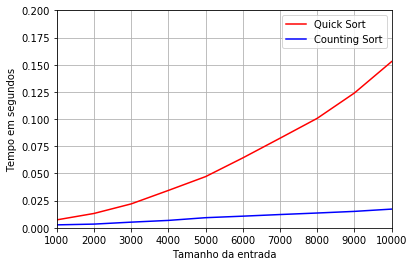

Números de 0 a 1000 



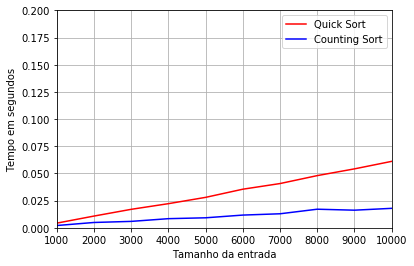

In [10]:
# tamVetor é um vetor com os valores que serão usados como tamanho da entrada
# tamVetor = np.array([500, 600, 700, 800, 900, 1000, 1500])

tamanhos = np.arange(0, 10000 +1, 1000)[1::]

print("Plotando gráficos para os seguintes tamanhos:\n", tamanhos, "\n")

plotToInputLens(tamanhos, RANGE=100)
plt.ylim([0,.2])
plt.legend()
plt.show()

plotToInputLens(tamanhos, RANGE=1000)
plt.ylim([0,.2])
plt.legend()
plt.show()

<font size=4>
    <i>OBS:Conforme aumentamos o Range, ou seja, o intervalo onde os elementos do vetor estão contidos, percebemos uma aproximação do gráfico do Quick Sort em relação ao do Counting Sort.</i>
</font>

### Plotando tempos para vetores de 10K a 100K elementos.
    1 - Com valores contidos no intervalo de 0 a 100.
    2 - Com valores contidos no intervalo de 0 a 1000.
    3 - Com valores contidos no intervalo de 0 a 10000.

Plotando gráficos para os seguintes tamanhos:
 [ 10000  20000  30000  40000  50000  60000  70000  80000  90000 100000] 

Números de 0 a 100 



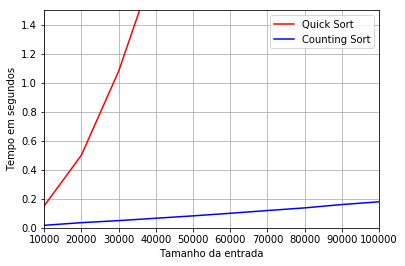

Números de 0 a 1000 



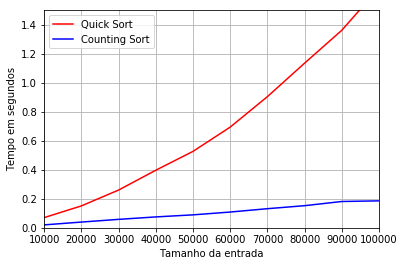

Números de 0 a 10000 



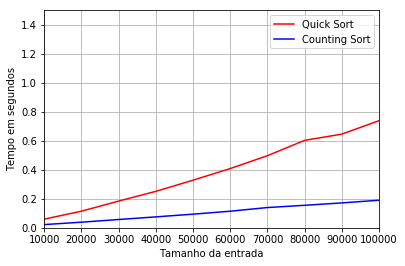

In [13]:
tamanhos = np.arange(0, 100000+1, 10000)[1::]

print("Plotando gráficos para os seguintes tamanhos:\n", tamanhos, "\n")

plotToInputLens(tamanhos, 100) # range = CEM
plt.ylim([0 , 1.5])
plt.legend()
plt.show()

plotToInputLens(tamanhos, 1000) # Range= MIL
plt.ylim([0 , 1.5])
plt.legend()
plt.show()

plotToInputLens(tamanhos, 10000) # Range= DEZ MIL
plt.ylim([0 , 1.5])
plt.legend()
plt.show()

<font size=5>Conclusões</font>

<font size=4>
    Em termos de tempo de execução, o Counting Sort é mais eficiente que o Quick Sort por muitos motivos:<br>
    O mais importante é que o Counting trabalha diretamente com os índices onde os valores devem ser colocados na versão ordenada do vetor, e apesar de as vezes utilizar muita memória auxiliar para isso, ele simplesmente conta os elementos e os posiciona corretamente em um novo vetor.
</font>

<font size=4>
O CountingSort não depende exclusivamente do tamanho (n) do vetor de entrada, o intervalo (k) de valores que os elementos podem assumir também influencia no desempenho do Counting pois o mesmo cria um vetor auxiliar com o tamanho desse intervalo e preenche o mesmo afim de contar quantos elementos de cada valor desse intervalo existem dentro do vetor, e em seguida percorre novamente o mesmo vetor fazendo operações de soma. Portanto, o tamanho 'k' desse intervalo pode ter um peso significativo principalmente para valores assintóticos de k e n.
</font>

<font size=4>
    Percebemos nos gráficos, que o intervalo de valores também tem uma influência no desempenho do QuickSort. Isso acontece porque o Quick é um algoritmo de ordenação instável, ou seja, troca a posição relativa de valores idênticos. O seu desempenho diminui conforme o intervalo é maior porque quanto menor esse intervalo maiores são as chances de aparecerem valores repetidos no vetor, logo, maior será o número de comparações entre valores iguais.
</font>